In [2]:
import pandas as pd
import numpy as np

In [12]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)
# Generate synthetic data
n_rows = 10000
categories = ['Electronics', 'Clothing', 'Books', 'Home & Kitchen', 'Toys']
payment_methods = ['Credit Card', 'PayPal', 'Cash', 'Debit Card']
regions = ['North', 'South', 'East', 'West']
genders = ['Male', 'Female', 'Other']
data = {
'Order_ID': range(1, n_rows + 1),
'Customer_ID': ['C' + str(i).zfill(5) for i in range(1, n_rows + 1)],
'Product': [f'Product_{i}' for i in range(1, n_rows + 1)],
'Category': [random.choice(categories) for _ in range(n_rows)],
'Quantity': np.random.randint(1, 10, n_rows),
'Price': np.round(np.random.uniform(5, 500, n_rows), 2),
'Order_Date': [(datetime(2023, 1, 1) + timedelta(days=random.randint(0, 730))).strftime('%Y-%m-%d') for _ in range(n_rows)],
'Customer_Age': np.random.randint(18, 80, n_rows),
'Customer_Gender': [random.choice(genders) for _ in range(n_rows)],
'Region': [random.choice(regions) for _ in range(n_rows)],
'Payment_Method': [random.choice(payment_methods) for _ in range(n_rows)],
}
df = pd.DataFrame(data)
df['Total_Amount'] = df['Quantity'] * df['Price']
# Introduce missing values (5% of cells)
for col in ['Customer_Age', 'Customer_Gender', 'Price', 'Region']:
    mask = np.random.random(n_rows) < 0.05
df.loc[mask, col] = np.nan
# Introduce duplicates (1% of rows)
n_duplicates = int(n_rows * 0.01)
duplicate_rows = df.sample(n_duplicates)
df = pd.concat([df, duplicate_rows], ignore_index=True)
# Introduce inconsistencies
df.loc[df.sample(frac=0.02).index, 'Price'] = -df['Price'] # Negative prices
df.loc[df.sample(frac=0.02).index, 'Order_Date'] = '2025-13-45' # Invalid dates
# Save dataset
df.to_csv('ecommerce_sales.csv', index=False)

# Task 1: Data Cleaning

### 1. Load the Dataset:
Read ecommerce_sales.csv into a Pandas DataFrame.

In [3]:
df = pd.read_csv('ecommerce_sales.csv')

In [4]:
df

,Order_ID,Customer_ID,Product,Category,Quantity,Price,Order_Date,Customer_Age,Customer_Gender,Region,Payment_Method,Total_Amount
0,1,C00001,Product_1,Electronics,7,181.67,2024-08-22,20,Female,South,Cash,1271.69
1,2,C00002,Product_2,Electronics,4,58.60,2023-08-29,58,Female,North,Credit Card,234.40
2,3,C00003,Product_3,Books,8,213.33,2025-13-45,46,Male,East,Credit Card,1706.64
3,4,C00004,Product_4,Clothing,5,364.92,2024-05-11,54,Other,NaN,Credit Card,1824.60
4,5,C00005,Product_5,Clothing,7,58.11,2024-11-19,72,Other,South,Cash,406.77
...,...,...,...,...,...,...,...,...,...,...,...,...
10095,9605,C09605,Product_9605,Toys,5,205.24,2023-07-02,67,Female,West,Cash,1026.20
10096,7410,C07410,Product_7410,Toys,4,383.76,2023-02-01,49,Female,South,Cash,1535.04
10097,1410,C01410,Product_1410,Home & Kitchen,4,391.36,2024-06-12,64,Other,South,Cash,1565.44
10098,5876,C05876,Product_5876,Clothing,1,285.55,2024-08-28,59,Male,North,Debit Card,285.55


### 2. Handle Missing Values:
- Identify columns with missing values and compute the percentage of missing data for each.
- For Customer_Age , impute missing values with the median age.
- For Customer_Gender , impute missing values with the mode.
- For Price , impute missing values with the median price of the corresponding Category.

In [27]:
total_rows = df.shape[0]

missing_values = df.isnull().sum(axis=0)

missing_percentage = (missing_values / total_rows) * 100
missing_percentage

Order_ID           0.000000
Customer_ID        0.000000
Product            0.000000
Category           0.000000
Quantity           0.000000
Price              0.000000
Order_Date         0.000000
Customer_Age       0.000000
Customer_Gender    0.000000
Region             4.851485
Payment_Method     0.000000
Total_Amount       0.000000
dtype: float64

### 3. Remove Duplicates:
Identify and remove duplicate rows based on all columns.

In [81]:
df = df.drop_duplicates()

In [82]:
df

,Order_ID,Customer_ID,Product,Category,Quantity,Price,Order_Date,Customer_Age,Customer_Gender,Region,Payment_Method,Total_Amount
0,1,C00001,Product_1,Electronics,7,181.67,2024-08-22,20,Female,South,Cash,1271.69
1,2,C00002,Product_2,Electronics,4,58.60,2023-08-29,58,Female,North,Credit Card,234.40
2,3,C00003,Product_3,Books,8,213.33,2024-05-11,46,Male,East,Credit Card,1706.64
3,4,C00004,Product_4,Clothing,5,364.92,2024-05-11,54,Other,NaN,Credit Card,1824.60
4,5,C00005,Product_5,Clothing,7,58.11,2024-11-19,72,Other,South,Cash,406.77
...,...,...,...,...,...,...,...,...,...,...,...,...
9998,9999,C09999,Product_9999,Books,9,378.92,2023-01-16,33,Other,NaN,Debit Card,3410.28
9999,10000,C10000,Product_10000,Electronics,7,73.51,2024-07-29,59,Other,South,Cash,514.57
10075,7489,C07489,Product_7489,Books,9,478.35,2024-03-16,38,Female,North,Credit Card,4305.15
10083,3044,C03044,Product_3044,Home & Kitchen,8,437.26,2024-07-09,34,Male,East,Credit Card,3498.08


### 4. Fix Inconsistencies:

- Convert Order_Date to a datetime format. Identify and handle invalid dates 
(e.g., replace with the nearest valid date or drop).
- Ensure Price and Total_Amount are non-negative. Correct or drop rows with negative values.
- Verify that Total_Amount equals Quantity * Price . Fix discrepancies.

In [83]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')

In [84]:
df['Order_Date'] = df['Order_Date'].fillna(method='bfill')

C:\Users\AYAT LAPTOP POINT\AppData\Local\Temp\ipykernel_15564\731002073.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Order_Date'] = df['Order_Date'].fillna(method='bfill')


In [85]:
# Ensure 'Price' and 'Total_Amount' are non-negative

# Write a code to convert negative values with positive values (reducing - from the value)
df['Price'] = df['Price'].abs()
df['Total_Amount'] = df['Total_Amount'].abs()

In [86]:
# Find out the rows where (quantity * price != total_amount)
mask = ~np.isclose(df['Total_Amount'], df['Quantity'] * df['Price'])
df[mask]

,Order_ID,Customer_ID,Product,Category,Quantity,Price,Order_Date,Customer_Age,Customer_Gender,Region,Payment_Method,Total_Amount


### Save Cleaned Data:
Save the cleaned dataset as ecommerce_sales_cleaned.csv

In [ ]:
# But before we are cleaning some other data which is not mentioned in questions before saving it

In [ ]:
# Replacing the missing values of the region column with the previous value

In [90]:
df['Region'] = df['Region'].fillna(method='bfill')

C:\Users\AYAT LAPTOP POINT\AppData\Local\Temp\ipykernel_15564\2076420511.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Region'] = df['Region'].fillna(method='bfill')


In [ ]:
# Rounding the total amount upto 2 decimal points

In [95]:
df['Total_Amount'] = (df['Total_Amount']).round(2)

In [96]:
df.to_csv('ecommerce_sales_cleaned.csv')

# Task 2: Exploratory Data Analysis (EDA)

### 1. Summary Statistics:
- Compute descriptive statistics (mean, median, std, min, max) for Quantity , Price , Total_Amount and Customer_Age
using NumPy or Pandas.
- Group by Category and compute the average Total_Amount and total Quantity sold.

In [114]:
cols = ['Quantity', 'Price', 'Total_Amount', 'Customer_Age']
descriptive = (df[cols].describe()).round(2)

median_row = df[cols].median()
median_row.name = 'median'

descriptive = pd.concat([descriptive, pd.DataFrame(median_row).T])

In [115]:
descriptive

,Quantity,Price,Total_Amount,Customer_Age
count,10003.00,10003.00,10003.00,10003.00
mean,4.99,251.42,1252.30,48.53
std,2.59,141.95,1028.68,17.86
min,1.00,5.00,5.00,18.00
25%,3.00,129.94,409.00,33.00
50%,5.00,251.14,961.14,49.00
75%,7.00,372.04,1878.40,64.00
max,9.00,499.95,4498.38,79.00
median,5.00,251.14,961.14,49.00


In [119]:
# Group by categorical
# Compute the average of tatal amount and total quantity sold
grouped = (df.groupby('Category')[['Total_Amount', 'Quantity']].mean()).round(2)
sorted_df = grouped.sort_values(by='Total_Amount', ascending=False)
sorted_df

,Total_Amount,Quantity
Category,,
Home & Kitchen,1283.01,5.05
Electronics,1252.12,5.04
Toys,1249.47,5.02
Books,1244.69,4.90
Clothing,1230.83,4.95


### 2. Distribution Analysis:
- Create histograms for Price , Total_Amount , and Customer_Age using Matplotlib. Use appropriate bin sizes.
- Plot a boxplot of Total_Amount by Category to identify outliers.

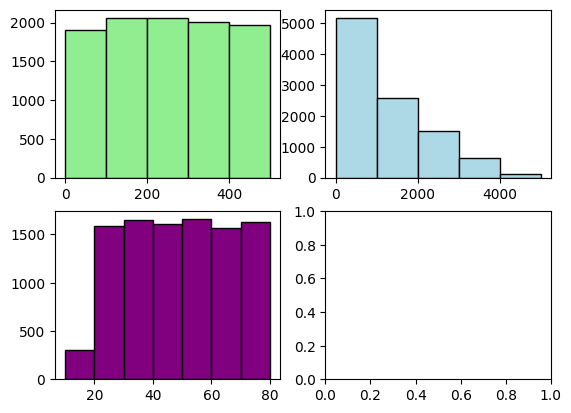

In [141]:
import matplotlib.pyplot as plt
# Create Histograms for Price, Total_Amount and Customer_Age
    # I am thinking of making histogras for each using subplots
cols = ['Price', 'Total_Amount', 'Customer_Age']
price_bins = [0, 100, 200, 300, 400, 500]
total_amount_bins = [1, 1000, 2000, 3000, 4000, 5000]
age_bins = [10, 20, 30, 40, 50, 60, 70, 80]

fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(df['Price'], bins=price_bins, color='lightgreen', edgecolor='black')
axs[0, 1].hist(df['Total_Amount'], bins=total_amount_bins, color='lightblue', edgecolor='black')
axs[1, 0].hist(df['Customer_Age'], bins=age_bins, color='purple', edgecolor='black')
plt.show()

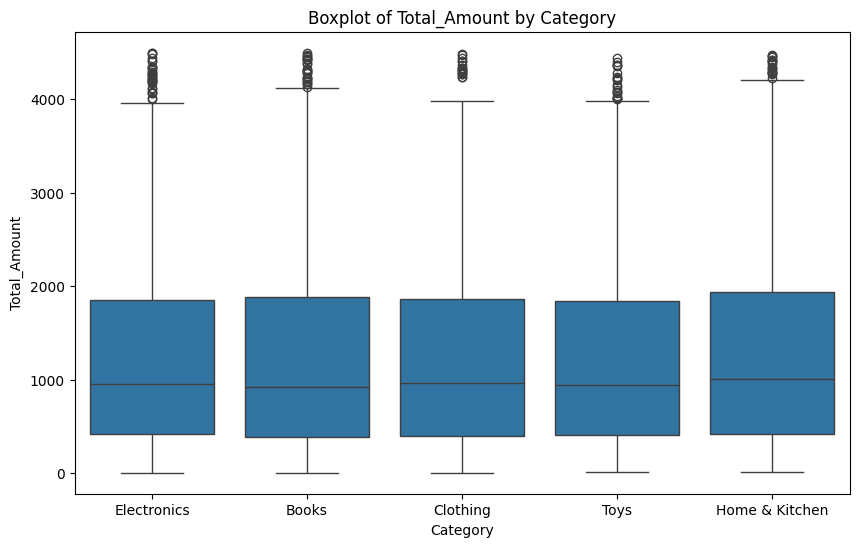

In [150]:
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.boxplot(x='Category', y='Total_Amount', data=df)

plt.title('Boxplot of Total_Amount by Category')
plt.xlabel('Category')
plt.ylabel('Total_Amount')

# Show the plot
plt.show()

### 3. Categorical Analysis:
- Compute the frequency of each Category , Region , Payment_Method , and Customer_Gender.
- Create bar plots to visualize the top 5 products by total sales ( Total_Amount ).

In [166]:
df['Category'].value_counts().sort_values(ascending=False).reset_index()

,Category,count
0,Home & Kitchen,2071
1,Toys,2002
2,Clothing,1985
3,Electronics,1976
4,Books,1969


In [165]:
df['Region'].value_counts().sort_values(ascending=False).reset_index()

,Region,count
0,West,2555
1,East,2522
2,North,2482
3,South,2444


In [164]:
df['Payment_Method'].value_counts().sort_values(ascending=False).reset_index()

,Payment_Method,count
0,Debit Card,2611
1,Credit Card,2497
2,Cash,2492
3,PayPal,2403


In [163]:
df['Customer_Gender'].value_counts().sort_values(ascending=False).reset_index()

,Customer_Gender,count
0,Male,3454
1,Other,3287
2,Female,3262


<Axes: xlabel='Product', ylabel='Total_Amount'>

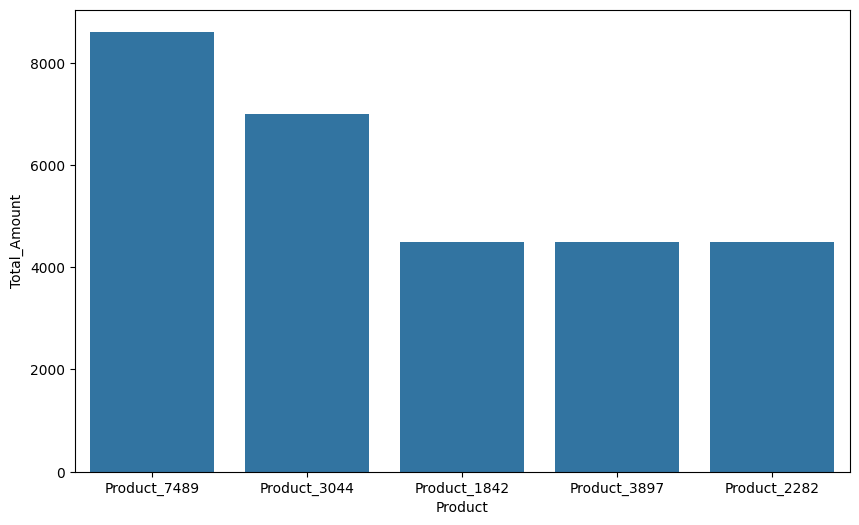

In [176]:
# Create a bar plot to visualize the top 5 products by total sales (Total Amount)
top_products = df.groupby('Product')['Total_Amount'].sum().sort_values(ascending=False).head(5)
top_products = top_products.reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Product', y='Total_Amount', data=top_products)

### 4. Time-Based Analysis:
- Extract the year and month from Order_Date .
- Plot the total Total_Amount by month using a line plot.
- Identify the month with the highest sales.

In [183]:
df['year'] = pd.DatetimeIndex(df['Order_Date']).year

In [186]:
df['month'] = pd.DatetimeIndex(df['Order_Date']).month

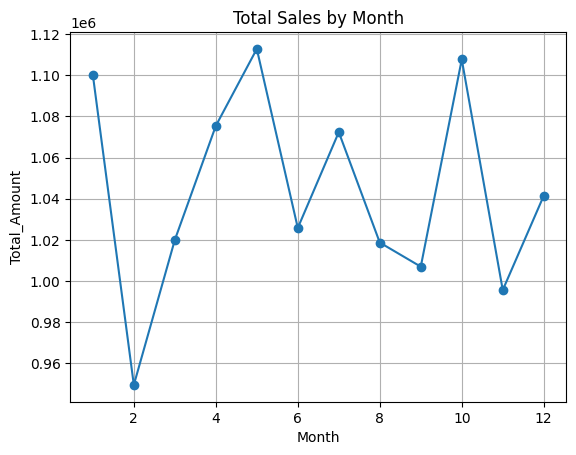

In [192]:
df.groupby('month')['Total_Amount'].sum().plot(kind='line', marker='o')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total_Amount')
plt.grid(True)
plt.show()

In [197]:
df.groupby('month')['Total_Amount'].sum().sort_values(ascending=False).head(1)

month
5    1112827.82
Name: Total_Amount, dtype: float64

In [ ]:
# So according to this the month with the highest sales is 5th month (that is) MAY,
# with the total sales of approxemately 1.1M

# Task 3: Advanced Analysis

In [5]:
df = pd.read_csv('ecommerce_sales_cleaned.csv')

In [6]:
df

,Unnamed: 0,Order_ID,Customer_ID,Product,Category,Quantity,Price,Order_Date,Customer_Age,Customer_Gender,Region,Payment_Method,Total_Amount
0,0,1,C00001,Product_1,Electronics,7,181.67,2024-08-22,20,Female,South,Cash,1271.69
1,1,2,C00002,Product_2,Electronics,4,58.60,2023-08-29,58,Female,North,Credit Card,234.40
2,2,3,C00003,Product_3,Books,8,213.33,2024-05-11,46,Male,East,Credit Card,1706.64
3,3,4,C00004,Product_4,Clothing,5,364.92,2024-05-11,54,Other,South,Credit Card,1824.60
4,4,5,C00005,Product_5,Clothing,7,58.11,2024-11-19,72,Other,South,Cash,406.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9998,9998,9999,C09999,Product_9999,Books,9,378.92,2023-01-16,33,Other,South,Debit Card,3410.28
9999,9999,10000,C10000,Product_10000,Electronics,7,73.51,2024-07-29,59,Other,South,Cash,514.57
10000,10075,7489,C07489,Product_7489,Books,9,478.35,2024-03-16,38,Female,North,Credit Card,4305.15
10001,10083,3044,C03044,Product_3044,Home & Kitchen,8,437.26,2024-07-09,34,Male,East,Credit Card,3498.08


### 1. Correlation Analysis:
- Compute the correlation matrix for Quantity , Price , Total_Amount , and Customer_Age using NumPy.
- Visualize the correlation matrix as a heatmap using Matplotlib.

In [8]:
col = ['Quantity', 'Price', 'Total_Amount', 'Customer_Age']
df_for_correlation = df[col]

In [9]:
correlation_matrix = df_for_correlation.corr()

In [10]:
correlation_matrix

,Quantity,Price,Total_Amount,Customer_Age
Quantity,1.000000,-0.008919,0.628895,-0.006590
Price,-0.008919,1.000000,0.684638,-0.023244
Total_Amount,0.628895,0.684638,1.000000,-0.030149
Customer_Age,-0.006590,-0.023244,-0.030149,1.000000


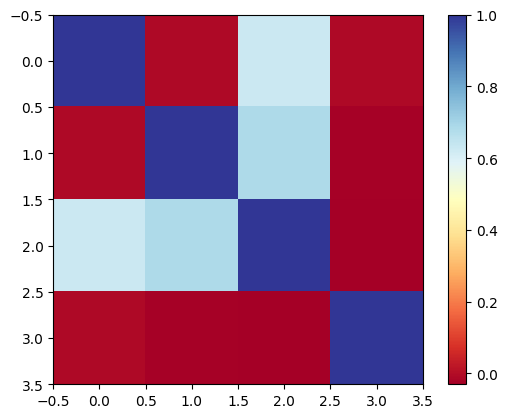

In [17]:
plt.imshow(correlation_matrix, cmap='RdYlBu')
plt.colorbar()

### 2. Customer Segmentation:
- Group customers by Customer_ID and compute their total Total_Amount and number of orders.
- Categorize customers into three segments based on total spending: Low (< $500), Medium ($500-$2000), High (> $2000).
- Create a pie chart showing the proportion of customers in each segment.

In [21]:
df.groupby('Customer_ID')['Total_Amount'].sum().reset_index()

,Customer_ID,Total_Amount
0,C00001,1271.69
1,C00002,234.40
2,C00003,1706.64
3,C00004,1824.60
4,C00005,406.77
...,...,...
9995,C09996,289.07
9996,C09997,708.05
9997,C09998,1796.58
9998,C09999,3410.28


In [24]:
df.groupby('Customer_ID')['Order_ID'].count().sort_values(ascending=False).reset_index()

,Customer_ID,Order_ID
0,C03044,2
1,C07489,2
2,C07927,2
3,C09987,1
4,C09988,1
...,...,...
9995,C09980,1
9996,C09981,1
9997,C09982,1
9998,C09983,1


In [26]:
# Categorize customers into 3 categories based on total spending (<500 = Low, 500-2000 = Medium, >2000 = High)
customer_spending = df.groupby('Customer_ID')['Total_Amount'].sum().reset_index()

In [29]:
bins = [0, 500, 2000, 4500]
labels = ['Low', 'Medium', 'High']

customer_spending['Spending_Category'] = pd.cut(customer_spending['Total_Amount'],
                                                bins=bins,
                                                labels=labels,
                                                right=False)
customer_spending

,Customer_ID,Total_Amount,Spending_Category
0,C00001,1271.69,Medium
1,C00002,234.40,Low
2,C00003,1706.64,Medium
3,C00004,1824.60,Medium
4,C00005,406.77,Low
...,...,...,...
9995,C09996,289.07,Low
9996,C09997,708.05,Medium
9997,C09998,1796.58,Medium
9998,C09999,3410.28,High


In [ ]:
# Create a pie chart showing the proportion of customers in each section

In [31]:
category_counts = df['Category'].value_counts()

In [34]:
category_counts

Category
Home & Kitchen    2071
Toys              2002
Clothing          1985
Electronics       1976
Books             1969
Name: count, dtype: int64

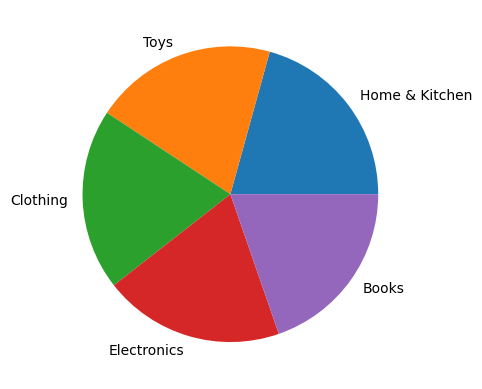

In [37]:
plt.pie(category_counts, labels=category_counts.index)
plt.show()

### 3. Regional Analysis:
- Group by Region and compute the average Total_Amount and total Quantity
- Create a stacked bar plot showing the Total_Amount by Category for each Region

In [46]:
group_by_total_amount_mean = (df.groupby('Region')['Total_Amount'].mean().reset_index()).round(2)
group_by_total_quantity_sum = df.groupby('Region')['Quantity'].sum().reset_index()

In [47]:
group_by_total_amount_mean

,Region,Total_Amount
0,East,1243.28
1,North,1238.37
2,South,1252.24
3,West,1274.80


In [45]:
group_by_total_quantity_sum

,Region,Quantity
0,East,12571
1,North,12350
2,South,12329
3,West,12705


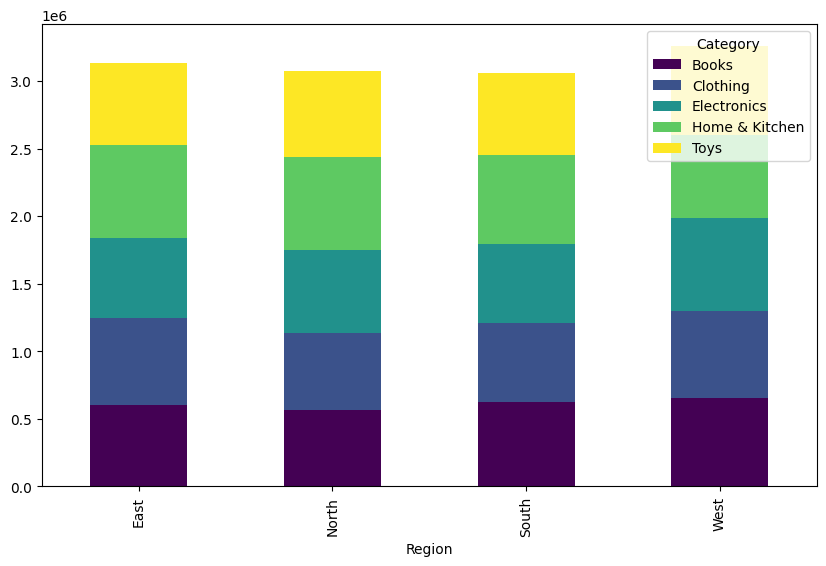

In [55]:
pivot = df.pivot_table(values='Total_Amount', index='Region', columns='Category', aggfunc='sum', fill_value=0)

pivot.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.show()

### 4. Payment Method Trends:
- Analyze the preference of Payment_Method by Customer_Age groups (e.g., 18-30, 31-50, 51+).
- Visualize the results using a grouped bar plot.

In [57]:
bins = [0, 30, 50, float('inf')]
labels = ['18-30', '31-50', '51+']
df['Age_Group'] = pd.cut(df['Customer_Age'], bins=bins, labels=labels, right=True)

In [62]:
age_payment = pd.crosstab(df['Age_Group'], df['Payment_Method'])
age_payment_percent = (age_payment.div(age_payment.sum(axis=1), axis=0) * 100).round(2)

In [67]:
age_payment_percent

Payment_Method,Cash,Credit Card,Debit Card,PayPal
Age_Group,,,,
18-30,24.88,25.07,27.23,22.81
31-50,23.40,25.82,25.61,25.17
51+,25.96,24.32,25.94,23.77


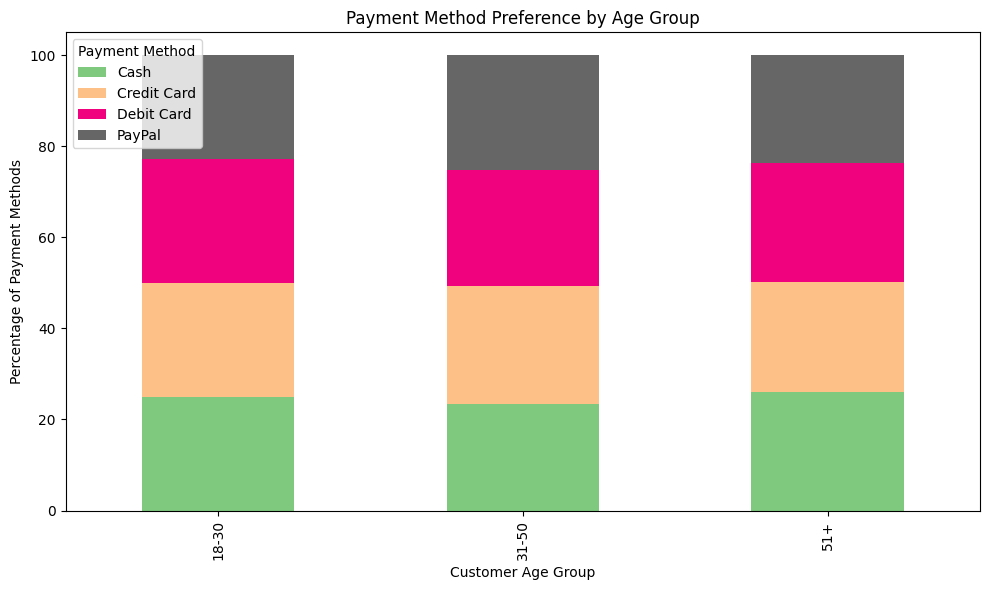

In [65]:
age_payment_percent.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Accent')

plt.title('Payment Method Preference by Age Group')
plt.xlabel('Customer Age Group')
plt.ylabel('Percentage of Payment Methods')
plt.legend(title='Payment Method', loc='upper left')
plt.tight_layout()
plt.show()

# Task 4: Insights and Visualization

### 1. Key Insights:
- Summarize at least five actionable insights based on your analysis
(e.g., which category performs best, which region has growth potential, etc.).
- Support each insight with relevant data or visualizations.

In [72]:
df.groupby('Category')['Order_ID'].count().sort_values(ascending=False)

Category
Home & Kitchen    2071
Toys              2002
Clothing          1985
Electronics       1976
Books             1969
Name: Order_ID, dtype: int64

1. Books and Electronics have a room for growth, they are clearly lagging behind in their sales
- They have approximately 100 units less sold then that of Home & Kitchen

In [90]:
age_grouped = df.groupby('Age_Group')['Order_ID'].count().sort_values(ascending=False)

C:\Users\AYAT LAPTOP POINT\AppData\Local\Temp\ipykernel_8788\2257903637.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_grouped = df.groupby('Age_Group')['Order_ID'].count().sort_values(ascending=False)


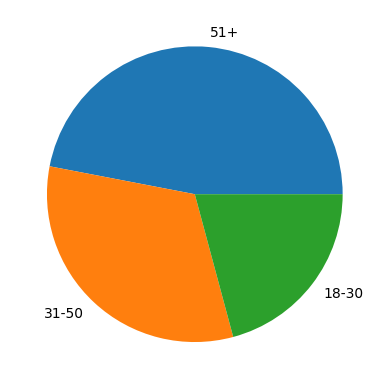

In [99]:
plt.pie(age_grouped, labels=age_grouped.index)
plt.show()

2. Majority of our costomers are of age group of 51+ and the least one have in age group 18-30,
we need to market our brand to 18-30 age group to attract that age group of customers

In [106]:
gender_grouped = df.groupby('Customer_Gender')['Total_Amount'].sum().sort_values(ascending=False).reset_index()

<BarContainer object of 3 artists>

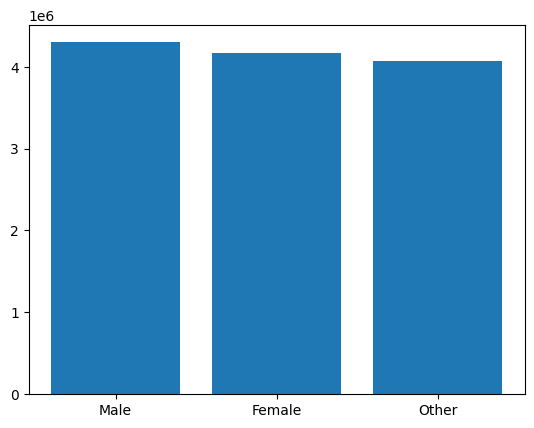

In [112]:
plt.bar(gender_grouped['Customer_Gender'], gender_grouped['Total_Amount'])

3. We need to target females more because sales to females are much less then that of Males

In [113]:
(df.groupby('Customer_Gender')['Total_Amount'].mean().sort_values(ascending=False)).round(0)

Customer_Gender
Female    1277.0
Male      1244.0
Other     1237.0
Name: Total_Amount, dtype: float64

4. Females spends 30 dollars more then on average then that of men and our females customers are also lagging behind, so there is a need of attract and target more females

In [89]:
group_by_region = df.groupby('Region')['Total_Amount'].sum().sort_values(ascending=False)
percentage_by_region = (group_by_region / group_by_region.sum()) * 100
(percentage_by_region).round(1)

Region
West     26.0
East     25.0
North    24.5
South    24.4
Name: Total_Amount, dtype: float64

5. West region has the greatest share of total sales i.e. 26%
and south has the least share of sales i.e. 24.4%

### 2. Dashboard:
- Create a single figure with four subplots using Matplotlib:
1. A bar plot of total sales by Category .
2. A line plot of monthly sales trends.
3. A pie chart of customer spending segments.
4. A boxplot of Total_Amount by Region .
- Ensure the dashboard is well-labeled and visually appealing.

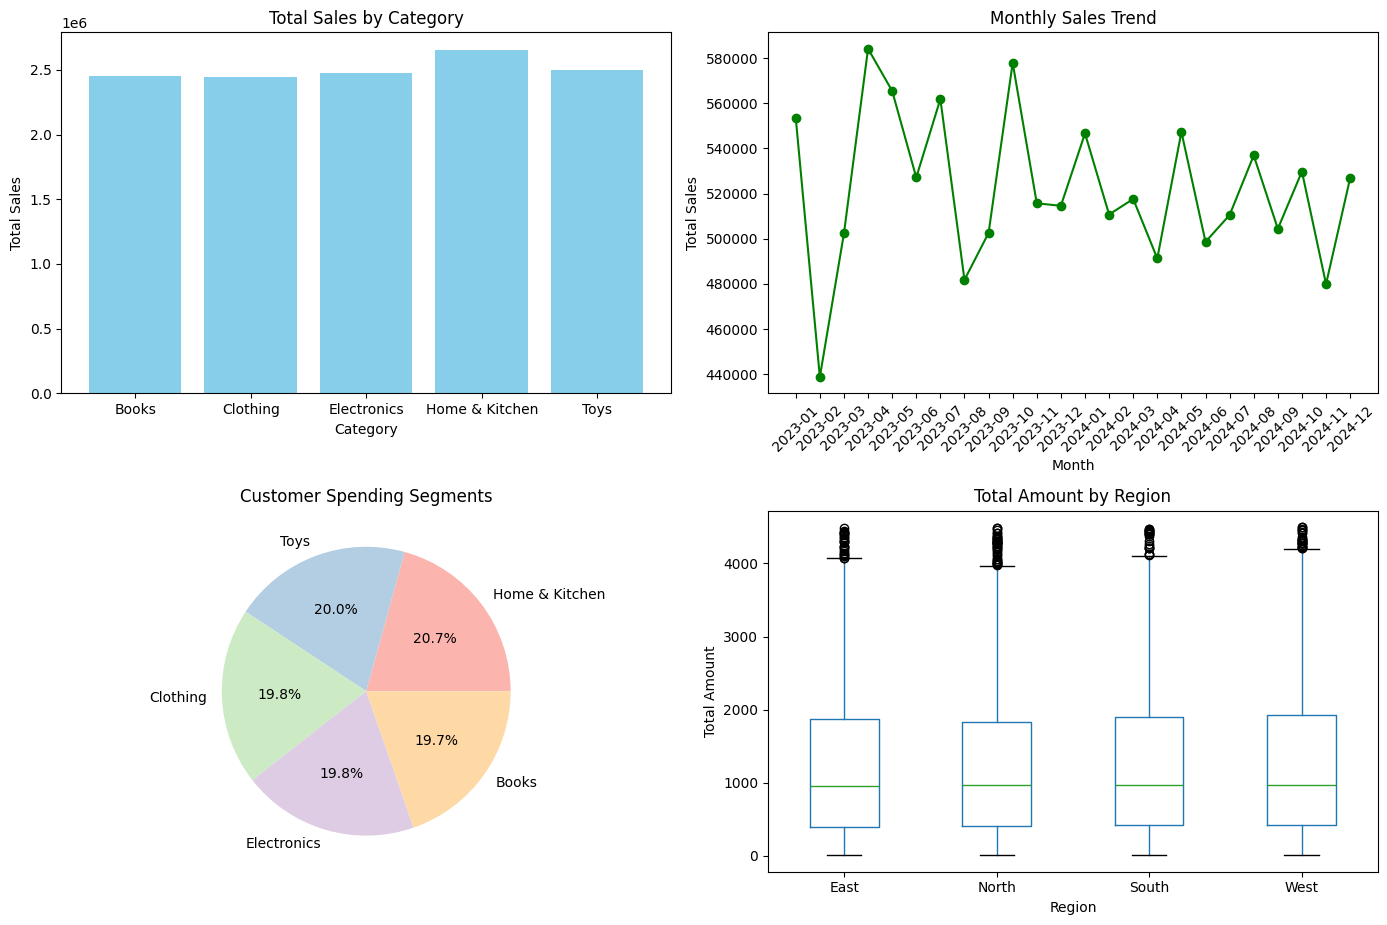

In [119]:
import matplotlib.pyplot as plt

df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')

category_sales = df.groupby('Category')['Total_Amount'].sum()
monthly_sales = df.groupby(df['Order_Date'].dt.to_period('M').astype(str))['Total_Amount'].sum()
segment_counts = df['Category'].value_counts()
region_order = df['Region'].unique()

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Sales Overview Dashboard', fontsize=16, fontweight='bold')

axs[0, 0].bar(category_sales.index, category_sales.values, color='skyblue')
axs[0, 0].set_title('Total Sales by Category')
axs[0, 0].set_xlabel('Category')
axs[0, 0].set_ylabel('Total Sales')

axs[0, 1].plot(monthly_sales.index, monthly_sales.values, marker='o', color='green')
axs[0, 1].set_title('Monthly Sales Trend')
axs[0, 1].set_xlabel('Month')
axs[0, 1].set_ylabel('Total Sales')
axs[0, 1].tick_params(axis='x', rotation=45)

axs[1, 0].pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%', colors=plt.cm.Pastel1.colors)
axs[1, 0].set_title('Customer Spending Segments')

df.boxplot(column='Total_Amount', by='Region', ax=axs[1, 1], grid=False)
axs[1, 1].set_title('Total Amount by Region')
axs[1, 1].set_xlabel('Region')
axs[1, 1].set_ylabel('Total Amount')
plt.suptitle('')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()